In [1]:
import pytesseract
import cv2
import numpy as np
import pandas as pd
from tkinter import Tk, filedialog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib
matplotlib.rcParams.update({"font.size": 20})
matplotlib.rcParams["figure.figsize"] = (20, 10)


In [2]:
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

In [166]:
def read_meta(file):
    nbr = int(file.split('_')[-1].split('.0.')[0]) + 1
    print(nbr)
    img = cv2.imread(file)
    image = img[595:770, 1050:1650]
    image = image_resize(image, height = 800)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Morph open to remove noise and invert image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
    image = 255 - opening
    
    
    dataout = []
    #80,475,600
    of_interest = [0,1,3,4]
    for i in range(0,770,70):
        if i/70 in of_interest:
            interm_image = image[i:i+70, :]
            # plt.imshow(interm_image)
            # plt.show()
            # plt.close()
            
            data = pytesseract.image_to_string(interm_image, lang='eng', config= '--psm 6')
            dataout.append(data)
    # display(dataout)
    dict_out = {}
    for i in range(len(dataout)):
        if dataout[i][:2] == 'i ':
            dataout[i] = dataout[i].replace('i ', ' ', 1)
        dataout[i] = dataout[i].replace('   ', ' ')
        dataout[i] = dataout[i].replace('  ', ' ')
        dataout[i] = dataout[i].replace('Time Offset', 'Time_Offset')
        dataout[i] = dataout[i].replace('is G', 's_G')
        dataout[i] = dataout[i].replace('aw G', 'w_G')
        dataout[i] = dataout[i].replace('\n\x0c', '')
        dataout[i] = dataout[i].replace(' '+str(nbr)+' ', '  ')
        dataout[i] = dataout[i].replace(' |', '', 1)
        dataout[i] = dataout[i].replace(' | ', ' ')
        dataout[i] = dataout[i].replace(' |', ' ')
        dataout[i] = dataout[i].replace('| ', ' ')
        dataout[i] = dataout[i].replace(' i', '', 1)
        dataout[i] = dataout[i].replace(' i ', '')
        dataout[i] = dataout[i].replace(' i', '')
        dataout[i] = dataout[i].replace('—_-', '—')
        dataout[i] = dataout[i].replace(' _', ' —')
        dataout[i] = dataout[i].replace('Vas', 'Vais')
        dataout[i] = dataout[i].replace('vas', 'Vais')
        dataout[i] = dataout[i].replace('P...', 'PS')
        dataout[i] = dataout[i].replace('MKILS', 'MKII')
        dataout[i] = dataout[i].replace('  ', ' ')
        
        # display(dataout[i])
        dict_out[i] = dataout[i].split(' ')[:]

    df = pd.DataFrame.from_dict(dict_out, orient='index')
    a = df.T.dropna()
    a = a.drop([0])
    a.columns = a.iloc[0]
    a = a.drop([1])
    a.insert(0, 'Ascent', nbr)
    a = a.rename(columns={"Parameter": "Sonde"})
    return a

In [167]:
out_df = []
for i in range(0,68):
    try:
        out_df.append(read_meta('./meta_data/meta_'+str(i)+'.0.png'))
    except:
        pass
result = pd.concat(out_df)
result

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


[ WARN:0@11378.650] global loadsave.cpp:244 findDecoder imread_('./meta_data/meta_23.0.png'): can't open/read file: check file path/integrity


26
27
28
29
30
31
32
33
34
35
36
37
38


[ WARN:0@11385.277] global loadsave.cpp:244 findDecoder imread_('./meta_data/meta_36.0.png'): can't open/read file: check file path/integrity


39
40
41
42
43
44
45
46
47


[ WARN:0@11391.149] global loadsave.cpp:244 findDecoder imread_('./meta_data/meta_45.0.png'): can't open/read file: check file path/integrity


48
49
50


[ WARN:0@11392.862] global loadsave.cpp:244 findDecoder imread_('./meta_data/meta_48.0.png'): can't open/read file: check file path/integrity


51
52
53
54
55
56
57
58
59
60
61
62


[ WARN:0@11402.245] global loadsave.cpp:244 findDecoder imread_('./meta_data/meta_60.0.png'): can't open/read file: check file path/integrity


63
64
65
66
67
68


1,Ascent,Sonde,Time_Offset,Date,Time,—
2,1,Vaisala,0.00,07-02-2005,10:01:53.551,NaN
3,1,SRS,—,—,—,NaN
4,1,Meisei,5,—,14:01:50,NaN
5,1,Modem,0,—,10:02:06,NaN
6,1,Vais_GPS,—,07-02-2005,10:01:53.554,NaN
...,...,...,...,...,...,...
2,68,Vaisala,—,25-02-2005,15:02:36.807,NaN
3,68,SRS,-3,—,—,NaN
4,68,Meisei,-30,—,19:02:09,NaN
5,68,Modem,2,—,15:02:52,NaN


In [171]:
! pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.3 MB/s eta 0:00:001.2 MB/s eta 0:00:01


In [173]:
result.to_csv('test.csv')

3


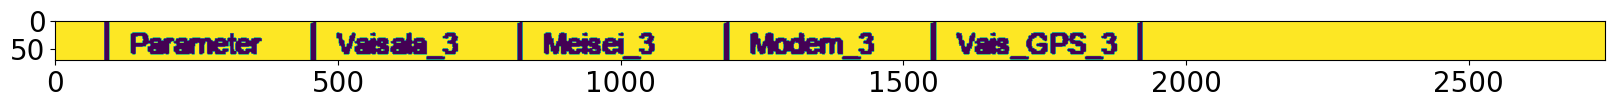

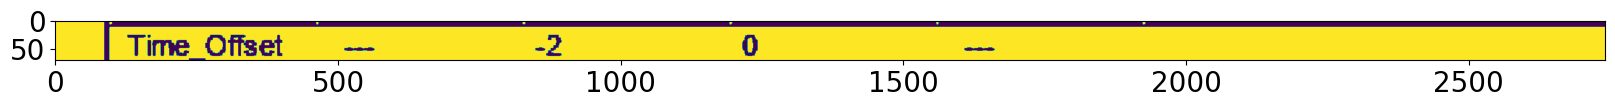

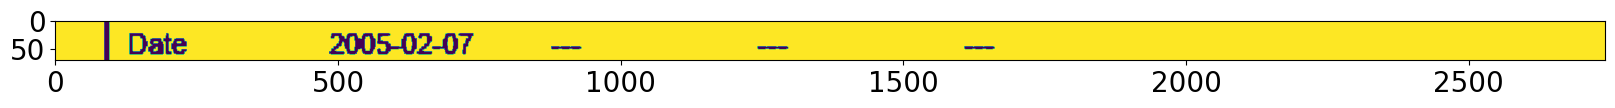

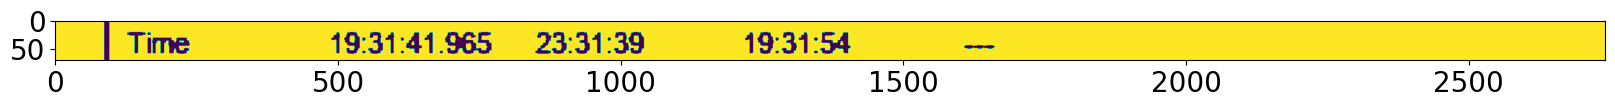

['| Parameter | Vaisala 3 | Meisei 3 | Modem 3 | Vais GPS 3 |\n\x0c',
 'i Time Offset — -2 0 —_-\n\x0c',
 '| Date 2005-02-07 — _ _\n\x0c',
 '| Time 49:31:41.965 23:31:39 19:31:54 —\n\x0c']

,0,1,2,3,4,5
0,Parameter,Vaisala,Meisei,Modem,Vas_GPS,
1,Time_Offset,—,-2,0,—_-,None
2,Date,2005-02-07,—,_,_,None
3,Time,49:31:41.965,23:31:39,19:31:54,—,None


In [47]:
df1 = read_meta('./meta_data/meta_2.0.png')
display(df1)

4


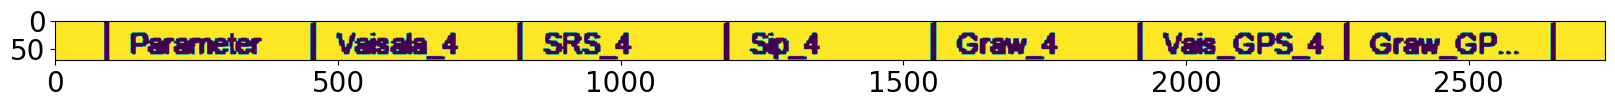

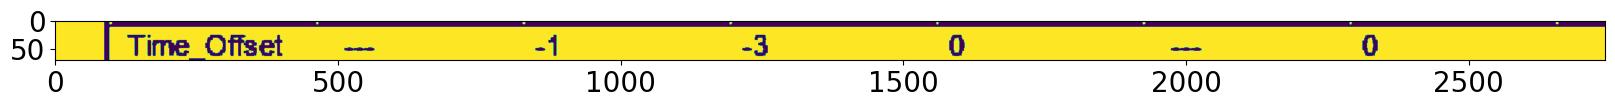

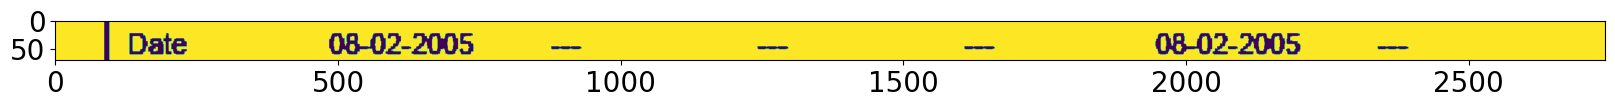

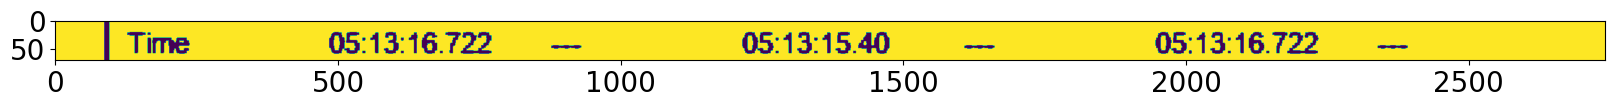

['| Parameter | Vaisala 4 | SRS 4 | Sip 4 | Graw 4 | vais GPS 4 | Graw GP... |\n\x0c',
 'i Time Offset — -1 -3 0 —_- 0\n\x0c',
 '| Date 08-02-2005 — _ _ 08-02-2005 —\n\x0c',
 '| Time 05:13:16.722 — 05:13:1540 — 05:13:16.722 —\n\x0c']

,0,1,2,3,4,5,6
0,Parameter,Vaisala,SRS,Sip,Graw,vas_GPS,Grw_GP...
1,Time_Offset,—,-1,-3,0,—_-,0
2,Date,08-02-2005,—,_,_,08-02-2005,—
3,Time,05:13:16.722,—,05:13:1540,—,05:13:16.722,—


In [48]:
df1 = read_meta('./meta_data/meta_3.0.png')
display(df1)

In [12]:
# Grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread('./meta_data/meta_0.0.png')
image = img[590:770, 1050:1600]

image = image_resize(image, height = 800)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

# Perform text extraction
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

plt.imshow(thresh)
plt.show()
plt.imshow(opening)
plt.show()
plt.imshow(invert)
plt.show()

data = pytesseract.image_to_data(invert, lang='eng', config= '--psm 6', pandas_config=0)
print(data)

NameError: name 'img' is not defined

In [18]:
data

'level\tpage_num\tblock_num\tpar_num\tline_num\tword_num\tleft\ttop\twidth\theight\tconf\ttext\n1\t1\t0\t0\t0\t0\t0\t0\t2444\t800\t-1\t\n2\t1\t1\t0\t0\t0\t93\t22\t2129\t729\t-1\t\n3\t1\t1\t1\t0\t0\t93\t22\t2129\t729\t-1\t\n4\t1\t1\t1\t1\t0\t93\t22\t2129\t76\t-1\t\n5\t1\t1\t1\t1\t1\t80\t18\t34\t99\t33\t|\n5\t1\t1\t1\t1\t2\t113\t18\t257\t99\t33\tParameter\n5\t1\t1\t1\t1\t3\t394\t18\t67\t99\t69\t|\n5\t1\t1\t1\t1\t4\t460\t18\t199\t99\t19\tVaisala\n5\t1\t1\t1\t1\t5\t757\t18\t67\t99\t55\t|\n5\t1\t1\t1\t1\t6\t823\t18\t182\t99\t15\tsRS1\n5\t1\t1\t1\t1\t7\t1120\t18\t50\t99\t15\t|\n5\t1\t1\t1\t1\t8\t1169\t18\t232\t99\t5\tMewei1\n5\t1\t1\t1\t1\t9\t1466\t18\t67\t99\t63\t|\n5\t1\t1\t1\t1\t10\t1532\t18\t298\t99\t0\tModem1__\n5\t1\t1\t1\t1\t11\t1829\t18\t34\t99\t85\t|\n5\t1\t1\t1\t1\t12\t1887\t18\t281\t99\t5\tVais_GPs_1\n5\t1\t1\t1\t1\t13\t2176\t18\t34\t99\t96\t|\n4\t1\t1\t1\t2\t0\t124\t110\t1846\t54\t-1\t\n5\t1\t1\t1\t2\t1\t124\t115\t267\t45\t90\tTime_Offset\n5\t1\t1\t1\t2\t2\t471\t115\t93\t36\t87\t

In [16]:
data['text']

TypeError: string indices must be integers

In [13]:
import PIL
im=invert
draw  = PIL.ImageDraw.Draw(im)
font = PIL.ImageFont.truetype("/usr/share/fonts/gnu-free/FreeSerifBold.ttf",12)
by = font.getsize("S")[1]
col = [240,480]
px = []

for y in range(0,im.size[1],by+5):
    for x in col:
        draw.text((x,y),"QQ",font=font,fill=0)
im=im.resize((im.size[0]*2,im.size[1]*2))
plt.imshow(im)
plt.show()


AttributeError: module 'PIL' has no attribute 'ImageDraw'